### Task 1: Data Exploration


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

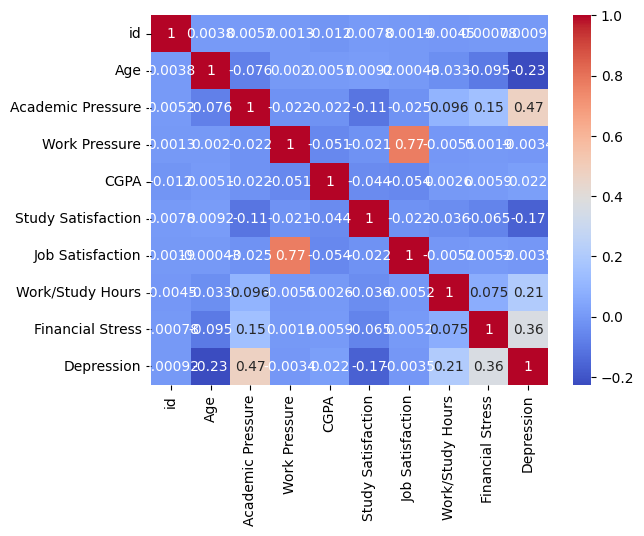

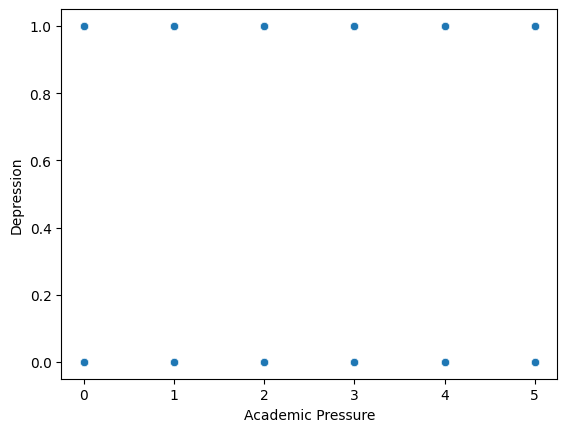

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Student Depression Dataset.csv')

#dataset info
print(data.info())
print(data.describe())

# Correlations between features
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

# Scatterplot between 'Academic Pressure' and 'Depression'
sns.scatterplot(x='Academic Pressure', y='Depression', data=data)
plt.show()


### Task 2: Data Cleaning


In [15]:
# Ensure numerical_columns and categorical_columns are defined (if not already)
numerical_columns = ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                     'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                     'Financial Stress', 'Depression']

categorical_columns = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
                       'Degree', 'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness']

# Handle missing values
# Numerical columns are filled with the median
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Categorical columns are filled with the mode
for col in categorical_columns:
    if col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Encode categorical variables ('Gender', 'City') using one-hot encoding only if they exist
cols_to_dummify = [c for c in ['Gender', 'City'] if c in data.columns]
if cols_to_dummify:
    data = pd.get_dummies(data, columns=cols_to_dummify, drop_first=True)

# Normalize/standardize numerical features ('Age', 'CGPA')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'CGPA']] = scaler.fit_transform(data[['Age', 'CGPA']])


C:\Users\bnuri\AppData\Local\Temp\ipykernel_19020\901554152.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


### Task 3: Logistic Regression Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

# training and testing sets
X = data.drop('Depression', axis=1)
y = data['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


ValueError: could not convert string to float: 'Student'

### Task 4: Model Evaluation

In [ ]:
# Print out Precision, Recall, F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
